In [42]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction import FeatureHasher
from sklearn.metrics import classification_report
from sklearn.metrics import brier_score_loss, roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score,f1_score,make_scorer,roc_curve

In [17]:
# Load the datasets
pokemon = pd.read_csv("pokemon.csv") 
battles = pd.read_csv("combats.csv")

In [3]:
pokemon.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [18]:
# Convert "Legendary" column, False is converted to 0 and True is converted to 1.
pokemon["Legendary"] = pokemon["Legendary"].astype(int)

In [21]:
battles.head().columns

Index(['First_pokemon', 'Second_pokemon', 'Winner'], dtype='object')

array([[<AxesSubplot:title={'center':'#'}>,
        <AxesSubplot:title={'center':'HP'}>,
        <AxesSubplot:title={'center':'Attack'}>],
       [<AxesSubplot:title={'center':'Defense'}>,
        <AxesSubplot:title={'center':'Sp. Atk'}>,
        <AxesSubplot:title={'center':'Sp. Def'}>],
       [<AxesSubplot:title={'center':'Speed'}>,
        <AxesSubplot:title={'center':'Generation'}>,
        <AxesSubplot:title={'center':'Legendary'}>]], dtype=object)

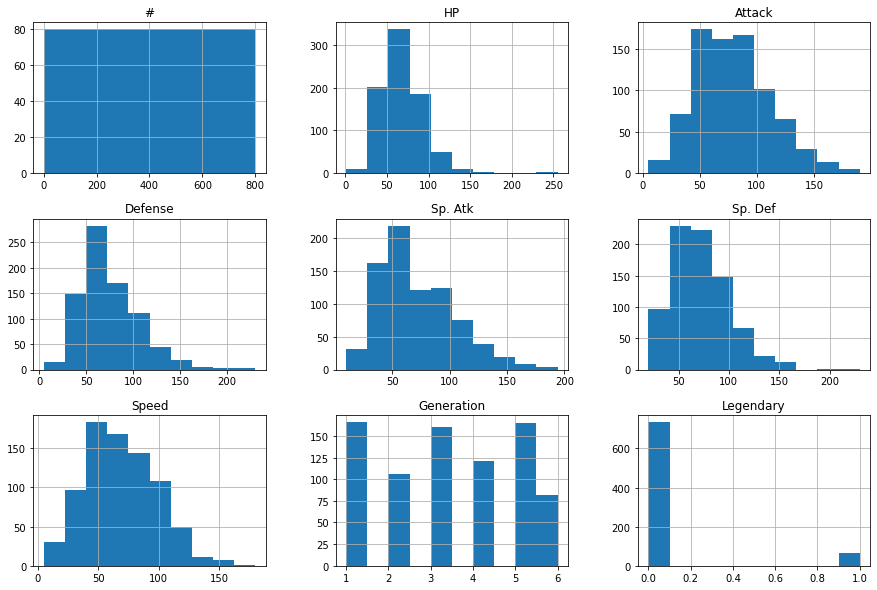

In [39]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

pokemon.hist(figsize=(15,10))

### Data Preparation 

<AxesSubplot:>

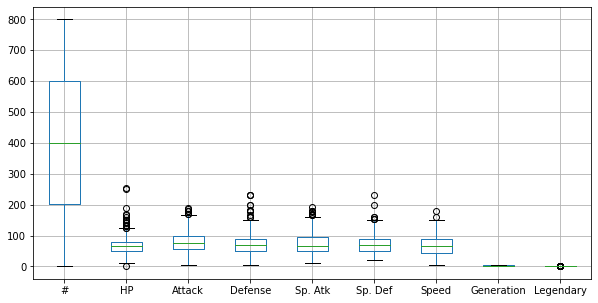

In [42]:
pokemon.boxplot(figsize = (10,5))

In [6]:
pokemon['Type 2'].isna().sum()

386

In [19]:
pokemon["Type 2"] = pokemon["Type 2"].fillna("NA")

In [12]:
pokemon

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,0
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,0
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,0
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,0
4,5,Charmander,Fire,NA,39,52,43,60,50,65,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
795,796,Diancie,Rock,Fairy,50,100,150,100,150,50,6,1
796,797,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,6,1
797,798,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,1
798,799,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,1


In [46]:
print(pokemon['Type 1'].nunique())
print(pokemon['Type 1'].unique())
print(pokemon['Type 2'].nunique())
print(pokemon['Type 2'].unique())

18
['Grass' 'Fire' 'Water' 'Bug' 'Normal' 'Poison' 'Electric' 'Ground'
 'Fairy' 'Fighting' 'Psychic' 'Rock' 'Ghost' 'Ice' 'Dragon' 'Dark' 'Steel'
 'Flying']
18
['Poison' nan 'Flying' 'Dragon' 'Ground' 'Fairy' 'Grass' 'Fighting'
 'Psychic' 'Steel' 'Ice' 'Rock' 'Dark' 'Water' 'Electric' 'Fire' 'Ghost'
 'Bug' 'Normal']


In [20]:
# covert strings to integers
h1 = FeatureHasher(n_features=4, input_type='string')
h2 = FeatureHasher(n_features=4, input_type='string')
d1 = h1.fit_transform(pokemon["Type 1"])
d2 = h2.fit_transform(pokemon["Type 2"])

In [47]:
print(pokemon['Type 1'].nunique())
print(pokemon['Type 1'].unique())
print(pokemon['Type 2'].nunique())
print(pokemon['Type 2'].unique())

18
['Grass' 'Fire' 'Water' 'Bug' 'Normal' 'Poison' 'Electric' 'Ground'
 'Fairy' 'Fighting' 'Psychic' 'Rock' 'Ghost' 'Ice' 'Dragon' 'Dark' 'Steel'
 'Flying']
18
['Poison' nan 'Flying' 'Dragon' 'Ground' 'Fairy' 'Grass' 'Fighting'
 'Psychic' 'Steel' 'Ice' 'Rock' 'Dark' 'Water' 'Electric' 'Fire' 'Ghost'
 'Bug' 'Normal']


In [21]:
# Convert to dataframe
d1 = pd.DataFrame(data=d1.toarray())
d2 = pd.DataFrame(data=d2.toarray())

# Drop Type 1 and Type 2 column from Pokemon dataset and concatenate the above two dataframes.
pokemon = pokemon.drop(columns = ["Type 1", "Type 2"])
pokemon = pd.concat([pokemon, d1, d2], axis=1)

In [15]:
pokemon

,#,Name,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,0,1,2,3,0,1,2,3
0,1,Bulbasaur,45,49,49,65,65,45,1,0,0.0,2.0,1.0,-2.0,-1.0,-2.0,0.0,1.0
1,2,Ivysaur,60,62,63,80,80,60,1,0,0.0,2.0,1.0,-2.0,-1.0,-2.0,0.0,1.0
2,3,Venusaur,80,82,83,100,100,80,1,0,0.0,2.0,1.0,-2.0,-1.0,-2.0,0.0,1.0
3,4,Mega Venusaur,80,100,123,122,120,80,1,0,0.0,2.0,1.0,-2.0,-1.0,-2.0,0.0,1.0
4,5,Charmander,39,52,43,60,50,65,1,0,0.0,0.0,-1.0,1.0,0.0,0.0,1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,796,Diancie,50,100,150,100,150,50,6,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
796,797,Mega Diancie,50,160,110,160,110,110,6,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
797,798,Hoopa Confined,80,110,60,150,130,70,6,1,0.0,-5.0,1.0,-1.0,0.0,0.0,0.0,-1.0
798,799,Hoopa Unbound,80,160,60,170,130,80,6,1,0.0,-5.0,1.0,-1.0,0.0,1.0,2.0,-1.0


In [ ]:
# x = pokemon.loc[pokemon["#"]==1].values[:, 2:][0]
# print(x)
# y = pokemon.loc[pokemon["#"]==298].values[:, 2:][0]
# print(y)
# z = np.concatenate((x,y))
# z

In [22]:
from copy import copy
data = []
i = 0
for t in battles.itertuples():
    i += 1
    first_pokemon = t[1]
    second_pokemon = t[2]
    winner = t[3]
    x = pokemon.loc[pokemon["#"]==first_pokemon].values[:, 2:][0]
    y = pokemon.loc[pokemon["#"]==second_pokemon].values[:, 2:][0]
#     diff = (x-y)[:6]
    z = np.concatenate((x,y))
    if winner == first_pokemon:
        z = np.append(z, [0])
    else:
        z = np.append(z, [1])
        
    data.append(z)

In [23]:
data = np.asarray(data)
# print(data[0])
print(z)
print("----")
print(data)

[78 104 78 159 115 100 1 0 0.0 0.0 -1.0 1.0 0.0 -1.0 -1.0 0.0 70 80 50 35
 35 35 1 0 -1.0 -3.0 -3.0 -1.0 0.0 0.0 1.0 -1.0 0]
----
[[50 64 50 ... 2.0 -1.0 1]
 [91 90 72 ... -3.0 -1.0 1]
 [55 40 85 ... 1.0 -1.0 1]
 ...
 [60 50 100 ... 1.0 -1.0 1]
 [40 30 50 ... 0.0 1.0 0]
 [78 104 78 ... 1.0 -1.0 0]]


### Model Processing

In [24]:
X = data[:, :-1].astype(int)
y = data[:, -1].astype(int)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train, y_train
print(X_train.shape)

(37500, 32)


In [ ]:
X_train[0]

In [ ]:
y_train

In [ ]:
# from sklearn.model_selection import RandomizedSearchCV
# # Number of trees in random forest
# n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# # Number of features to consider at every split
# max_features = ['auto', 'sqrt']
# # Maximum number of levels in tree
# max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
# max_depth.append(None)
# # Minimum number of samples required to split a node
# min_samples_split = [2, 5, 10]
# # Minimum number of samples required at each leaf node
# min_samples_leaf = [1, 2, 4]
# # Method of selecting samples for training each tree
# bootstrap = [True, False]
# # Create the random grid
# random_grid = {'n_estimators': n_estimators,
#                'max_features': max_features,
#                'max_depth': max_depth,
#                'min_samples_split': min_samples_split,
#                'min_samples_leaf': min_samples_leaf,
#                'bootstrap': bootstrap}
# print(random_grid)

In [ ]:
# # Use the random grid to search for best hyperparameters
# # First create the base model to tune
# rf = RandomForestClassifier()
# # Random search of parameters, using 3 fold cross validation, 
# # search across 100 different combinations, and use all available cores
# rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# # Fit the random search model
# rf_random.fit(X_train, y_train)

In [ ]:
# rf_random.best_params_

In [ ]:
# from sklearn.model_selection import GridSearchCV
# # Create the parameter grid based on the results of random search 
# param_grid = {
#     'bootstrap': [True],
#     'max_depth': [80, 90, 100, 110],
#     'max_features': [2, 3],
#     'min_samples_leaf': [3, 4, 5],
#     'min_samples_split': [8, 10, 12],
#     'n_estimators': [100, 200, 300, 1000]
# }
# # Create a based model
# rf = RandomForestClassifier()
# # Instantiate the grid search model
# grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
#                           cv = 3, n_jobs = -1, verbose = 2)

In [ ]:
# Fit the grid search to the data
# grid_search.fit(X_train, y_train)

In [ ]:
# grid_search.best_params_

In [27]:
# Random forest
rf_clf = RandomForestClassifier(n_estimators=100)
rf_model = rf_clf.fit(X_train,y_train)
rf_pred = rf_model.predict(X_test)
print(f"Expected : {y_test}")
print(f"Predicted : {rf_pred}")

Expected : [1 0 0 ... 1 1 1]
Predicted : [1 0 0 ... 1 1 1]


In [45]:
print('Accuracy :', accuracy_score(rf_pred, y_test))
print(classification_report(y_test, rf_pred))

Accuracy : 0.94848
              precision    recall  f1-score   support

           0       0.94      0.95      0.95      5941
           1       0.95      0.95      0.95      6559

    accuracy                           0.95     12500
   macro avg       0.95      0.95      0.95     12500
weighted avg       0.95      0.95      0.95     12500



In [31]:
print(roc_auc_score(y_test, rf_model.predict_proba(X_test)[:,1]))

0.9828608649791762


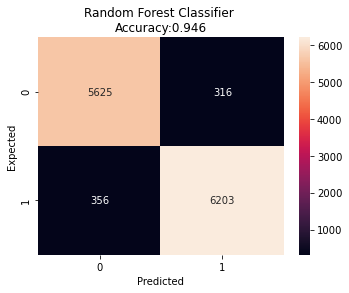

In [40]:
cm = metrics.confusion_matrix(y_test, rf_pred)

plt.figure(figsize=(5.5,4))
sns.heatmap(cm, annot=True, fmt="g")
plt.title('Random Forest Classifier \nAccuracy:{0:.3f}'.format(rf_model.score(X_test, y_test)))
plt.ylabel('Expected')
plt.xlabel('Predicted')
plt.show()

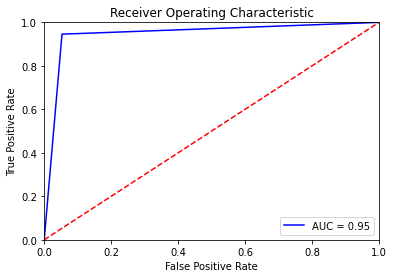

In [43]:
# calculate the fpr and tpr for all thresholds of the classification
fpr, tpr, threshold = roc_curve(y_test, rf_pred)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [14]:
from copy import copy
master_data = copy(pokemon)
master_data['hash_map'] = master_data[master_data.columns[2:9]].astype(str).apply(''.join, axis=1)
def get_evaluation_list(data_set, data_set_result):
    expected_pre = []
    string_value = ''
    for ele in data_set[0][:7]:
        string_value = string_value + str(ele)
    for index in range(0, len(data_set)):
        hash_map = ''
        if data_set_result[index] == 0:
            for ele in data_set[index][:7]:
                hash_map = hash_map + str(ele)
        else:
            for ele in data_set[index][18:25]:
                hash_map = hash_map + str(ele)
        get_value = master_data.loc[master_data['hash_map'] == hash_map]
        expected_pre.append(master_data.loc[master_data['hash_map'] == hash_map]['Name'].values[0])
    return expected_pre

In [ ]:
# mapping pokemon name for expected targets

expected_targets = get_evaluation_list(X_test, y_test)
expected_targets

In [ ]:
# mapping pokemon name for predicted targets of Random Forest

predicted_targets_rf = get_evaluation_list(X_test, rf_pred)
predicted_targets_rf

In [ ]:
count = 0
for index in range(0, len(expected_targets)):
    if expected_targets[index] != predicted_targets_rf[index]:
        print(f"Expected - {expected_targets[index]} , Predicted - {predicted_targets_rf[index]}")
        count +=1
print(f"Miss matched number of values : {count}")
        

#### Model complexity Vs Accuracy 

In [20]:
from sklearn.model_selection import validation_curve

def getValidationCurve(model,paramName):
    degrees = np.arange(1, 20)
    train_scores, validation_scores = validation_curve(
                     model, X_train, y_train,
                     param_name=paramName,
                     param_range=degrees)

    # Plot the mean train error and validation error across folds
    plt.figure(figsize=(6, 4))
    plt.plot(degrees, validation_scores.mean(axis=1), lw=2,
             label='cross-validation')
    plt.plot(degrees, train_scores.mean(axis=1), lw=2, label='training')

    plt.legend(loc='best')
    plt.xlabel('degree of fit')
    plt.ylabel('explained variance')
    plt.title('Validation curve')
    plt.tight_layout()


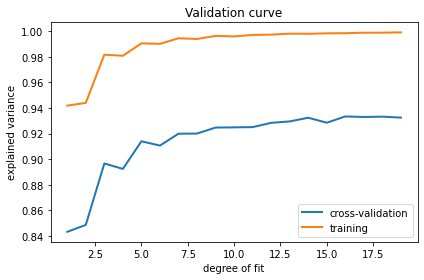

In [21]:
getValidationCurve(rf_model,'n_estimators')

Tried with n_estimators [100,200,300,500,700,1000]. Best is 1000 which is giving 94.912% accuracy.

### SVM 

In [44]:
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

svm_clf = make_pipeline(StandardScaler(), svm.SVC(kernel='rbf'))
svm_model = svm_clf.fit(X_train,y_train)
svm_pred = svm_model.predict(X_test)
print(f"Expected : {y_test}")
print(f"Predicted : {svm_pred}")

Expected : [1 0 0 ... 1 1 1]
Predicted : [1 0 0 ... 1 1 1]


In [45]:
print('Accuracy :', accuracy_score(svm_pred, y_test))

print(classification_report(y_test, svm_pred))

Accuracy : 0.90432
              precision    recall  f1-score   support

           0       0.90      0.90      0.90      5941
           1       0.91      0.91      0.91      6559

    accuracy                           0.90     12500
   macro avg       0.90      0.90      0.90     12500
weighted avg       0.90      0.90      0.90     12500



poly - 90.032
linear - 90.896
rbf - 90.608
segmoid - 79.488
so the best one to use is linear

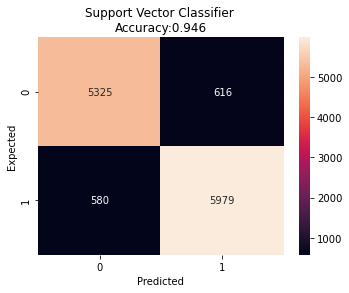

In [47]:
cm = metrics.confusion_matrix(y_test, svm_pred)

plt.figure(figsize=(5.5,4))
sns.heatmap(cm, annot=True, fmt="g")
plt.title('Support Vector Classifier \nAccuracy:{0:.3f}'.format(rf_model.score(X_test, y_test)))
plt.ylabel('Expected')
plt.xlabel('Predicted')
plt.show()

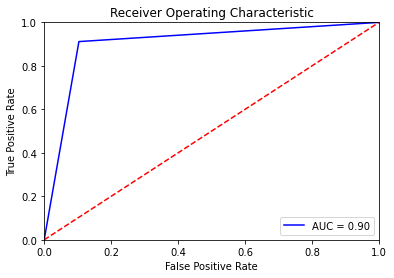

In [48]:
# calculate the fpr and tpr for all thresholds of the classification
fpr, tpr, threshold = roc_curve(y_test, svm_pred)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
# mapping pokemon name for predicted targets of SVM

predicted_targets_svm = get_evaluation_list(X_test, svm_pred)
predicted_targets_svm

In [28]:
getValidationCurve(svm_model,'gamma')

ValueError: Invalid parameter gamma for estimator Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(kernel='linear'))]). Check the list of available parameters with `estimator.get_params().keys()`.

In [32]:
# from sklearn.utils.estimator_checks import check_estimator
# from sklearn.svm import LinearSVC
# check_estimator(LinearSVC()) 

# check_estimator.get_params().keys()

### Ada Boost 

In [16]:
# Ada boost

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=1000,
    algorithm="SAMME.R", learning_rate=0.5, random_state=42)
ada_model = ada_clf.fit(X_train, y_train)
ada_pred = ada_model.predict(X_test)
print(f"Expected : {y_test}")
print(f"Predicted : {ada_pred}")

Expected : [1 0 0 ... 1 1 1]
Predicted : [1 0 0 ... 1 1 1]


In [18]:
print('Accuracy :', accuracy_score(ada_pred, y_test))

print(classification_report(y_test, ada_pred))

Accuracy : 0.8648
              precision    recall  f1-score   support

           0       0.87      0.84      0.86      5941
           1       0.86      0.88      0.87      6559

    accuracy                           0.86     12500
   macro avg       0.87      0.86      0.86     12500
weighted avg       0.86      0.86      0.86     12500



n_estimators 
100 - 86.016
500 - 86.384
1000 - 86.480

so the best one is 1000

In [ ]:
# mapping pokemon name for predicted targets of Ada Boost

predicted_targets_ada = get_evaluation_list(X_test, ada_pred)
predicted_targets_ada

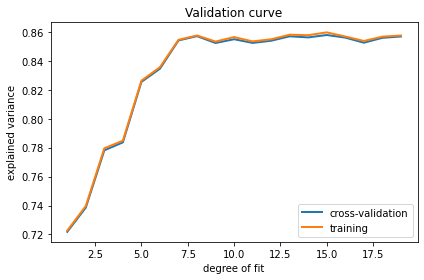

In [17]:
getValidationCurve(ada_model,'n_estimators')

The best model is random forest with n_estimators as 1000